# LGE-SNU DS 고급과정 
# EM 알고리즘 및 나이브 베이즈 실습

# 붓꽃 데이터
Scikit-Learn 패키지에는 150 송이의 붓꽃(iris)에 대한 데이터가 있다. 꽃받침(sepal) 길이, 꽃받침 너비, 꽃잎(petal) 길이, 꽃잎 너비, 그리고 세 종류의 품종에 대한 정보가 담겨있다.

| 변수&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; | 설명&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; 
|:----------------:|:-----------------:|
|    <br> sepal_length    | <br>꽃받침 길이 | <br>꽃받침 길이 | 
|<br> sepal_width |<br> 꽃받침 너비   | <br>꽃받침 길이 | 
|    <br> petal_length    | <br>꽃잎 길이 | <br>꽃받침 길이 | 
|<br> petal_width |<br> 꽃잎 너비   | <br>꽃받침 길이 | 
| <br> species    | <br> 품종  | <br>꽃받침 길이 | 


먼저 데이터 분석에 필요한 시각화 패키지 seaborn과 matplotlib을 불러오자.

In [105]:
import seaborn as sns # seaborn 패키지를 sns라는 오브젝트에 저장
import matplotlib.pyplot as plt


이후 seaborn 패키지의 load_dataset 함수를 이용해 내장된 iris 데이터를 불러오자.

In [106]:
iris = sns.load_dataset("iris") # load iris data

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


4가지 변수 중 품종 별 꽃잎 길이를 히스토그램으로 나타내보자.

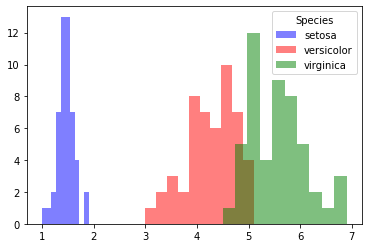

In [107]:

plt.hist(iris[iris.species == "setosa"]["petal_length"], color="blue",alpha=0.5,
         label="setosa")
plt.hist(iris[iris.species == "versicolor"]["petal_length"], color="red",alpha=0.5,
        label="versicolor")
plt.hist(iris[iris.species == "virginica"]["petal_length"], color="green",alpha=0.5,
        label="virginica")
plt.legend(title="Species")
plt.show()


- 위의 그래프를 살펴보면 각 품종별로 데이터가 군집을 이룸을 관찰할 수 있다.


- 그렇다면 품종에 대한 정보가 없이 관측한 꽃잎의 길이만으로 같은 품종끼리 구분해낼 수 있을까?

# 가우시안 혼합모형과 EM알고리즘
- 꽃잎의 길이(sepal length)가 3개의 군집으로 이루어져있는 가우시안 혼합분포를 따른다고 하자. $X_1,\cdots,X_n$를 관측한 꽃잎의 길이라 하면
$$X_1,\cdots,X_n \overset{\text{i.i.d}}{\sim} f(x | \theta),$$
$$f(x|\theta)=w_1N(\mu_1,{\sigma_1}^2)+w_2N(\mu_2,{\sigma_2}^2)+w_3N(\mu_3,{\sigma_3}^2),$$  $$w_1+w_2+w_3=1, \theta=(\mu_1,\sigma_1,w_1,\cdots,\mu_3,\sigma_3,w_3)$$
로 표현가능하다.


- $K_i$를 $i$ 번째 데이터가 어느 군집에 속하는지 알려주는 label이라 하자.
우리가 관심있는 대상은 각 데이터가 어떤 카테고리에 속하는가를 알려주는 조건부 확률 $$\lambda_j(X_i,\theta)=P(K_i=j \mid X_i,\theta)$$
이다. 예를 들어
$$\lambda_1(X_1,\theta)=0.2, \lambda_2(X_1,\theta)=0.3, \lambda_3(X_1,\theta)=0.5$$
라면 1번째 데이터가 3번째 군집에 속할 확률이 가장 높으므로 3번째 군집에 속한다고 결론을 내릴 수 있다.


- 해당하는 확률을 얻기 위해서는 모수 $\theta$에 대한 MLE를 구해야하며, 이를 위해 앞서 배운 EM 알고리즘을 적용하면 다음과 같다.


### E-step
\begin{eqnarray}
\lambda_j(X_i,\theta)&=&P(K_i=j \mid X_i,\theta)\\
&=& \dfrac{P(K_i=j)P(X_i\mid K_i=j, \theta)}{P(X_i|\theta)} \\
&=& \dfrac{P(K_i=j)P(X_i\mid K_i=j, \theta)}{\sum_{k=1}^3 P(X_i,K_i=k|\theta)} \\
&=& \dfrac{P(K_i=j)P(X_i\mid K_i=j, \theta)}{\sum_{k=1}^3 P(K_i=k)P(X_i\mid z_i=k, \theta)}\\
&=& \dfrac{w_j N(\mu_j,\sigma_j)}{\sum_{k=1}^3 w_k N(\mu_k,\sigma_k)}
\end{eqnarray}


### M-step
- $$
\mu_j = \dfrac{1}{N_j} \sum_{i=1}^N X_i\lambda_j(X_i,\theta)$$

- $$ \sigma_j = \dfrac{1}{N_j} \sum_{i=1}^n (X_i-\mu_j)^2\lambda_j(X_i,\theta) $$

- $$ w_j=\frac{1}{n}\sum_{i=1}^{n}{\lambda_j(X_i,\theta)}$$

$\;\;\;\;,where     \;   N_j = \sum_{i=1}^n \lambda_j(X_i,\theta). $



- scikitlearn 에는 여러 혼합모형에 대한 함수들을 제공한다.


- 내장된 함수를 이용하여 군집분석을 시행해보자.

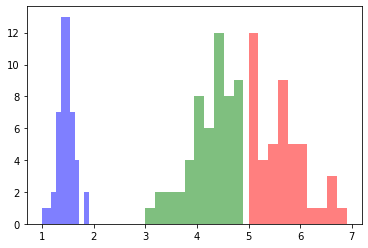

In [108]:
from sklearn import mixture

# GMM 모형 fit
gmm_iris=mixture.GaussianMixture(n_components=3).fit(iris[['petal_length']]) # n_component : 군집의 수

# pred_gmm_iris 에는 각 데이터별 예측된 군집의 정보 (0,1,2) 가 담겨있다.
pred_gmm_iris=gmm_iris.predict(iris[['petal_length']])


iris['gmm_pred']=pred_gmm_iris

# 예측된 군집별 plot 그리기
plt.hist(iris[iris.gmm_pred == 0]["petal_length"], color="blue",alpha=0.5)
plt.hist(iris[iris.gmm_pred == 1]["petal_length"], color="red",alpha=0.5)
plt.hist(iris[iris.gmm_pred == 2]["petal_length"], color="green",alpha=0.5)

plt.show()


- 앞선 실제 그래프와 비교했을 때 군집분석이 잘 이루어진 것으로 보인다.


- 실제 데이터와 얼마나 일치하는지 구체적으로 나타내면 다음과 같다.

In [109]:
from sklearn import metrics

iris_gmm_score = metrics.adjusted_rand_score(iris['species'],pred_gmm_iris)

# Print the score
iris_gmm_score

0.8509627406851713

## 전체 데이터를 이용한 군집분석


- 이제 꽃잎의 길이 뿐만 아니라 나머지 3가지 변수(꽃잎의 너비, 꽃받침의 너비, 길이)를 모두 이용해 군집분석을 해보자.
먼저 네 변수간의 그래프를 그리면 다음과 같다.

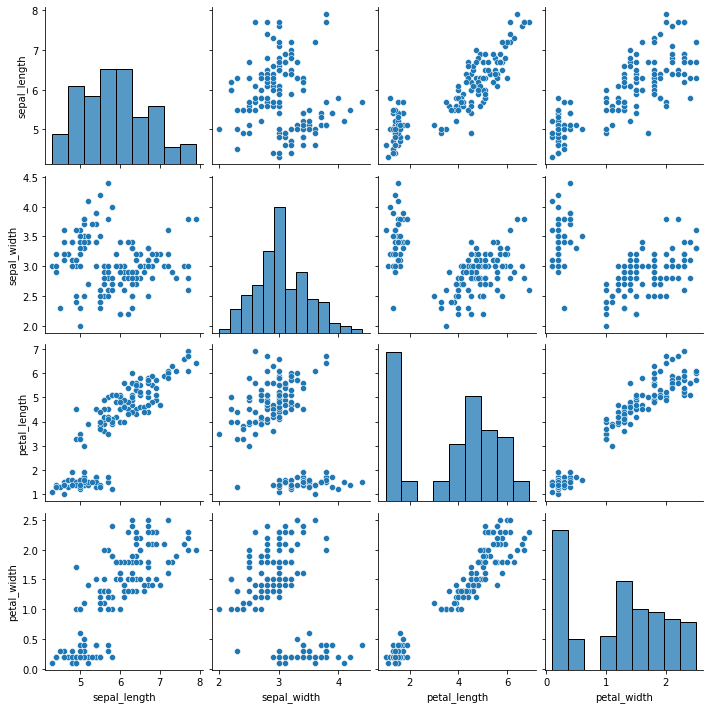

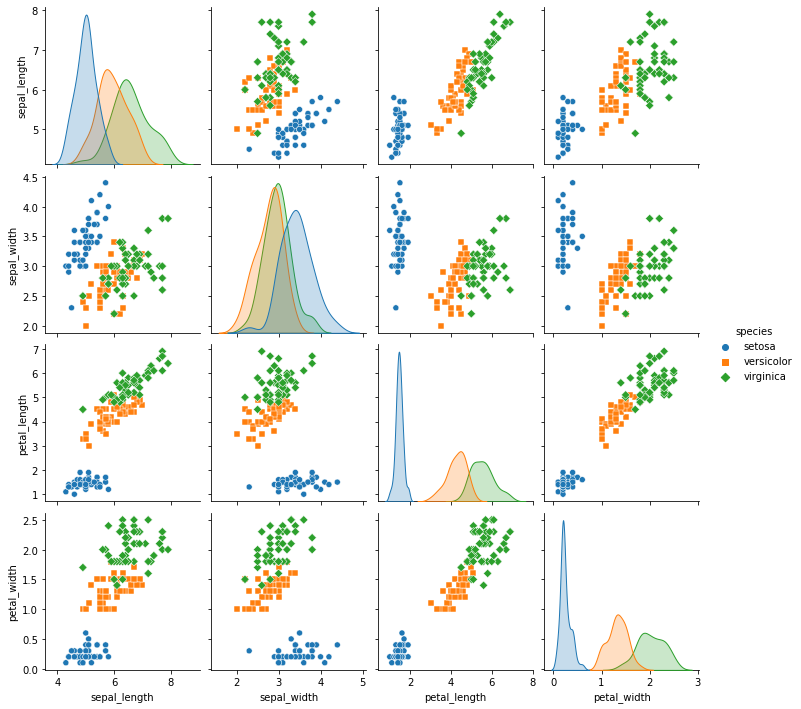

In [110]:
# data load
iris = sns.load_dataset("iris")

# 품종구분 X
sns.pairplot(iris)

# 품종구분 O
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])


- 강의에서는 1차원 데이터에 대한 군집분석만을 다루었지만 4개의 변수로 이루어진 4차원 데이터에 대해서도 군집분석을 시행할 수 있다. (이때 모수의 추정에는 다변량 가우시안 분포함수를 사용한다.) 


- 이전과 마찬가지로 GaussianMixture 함수를 이용하여 군집분석을 시행해보자.

0.9038742317748124

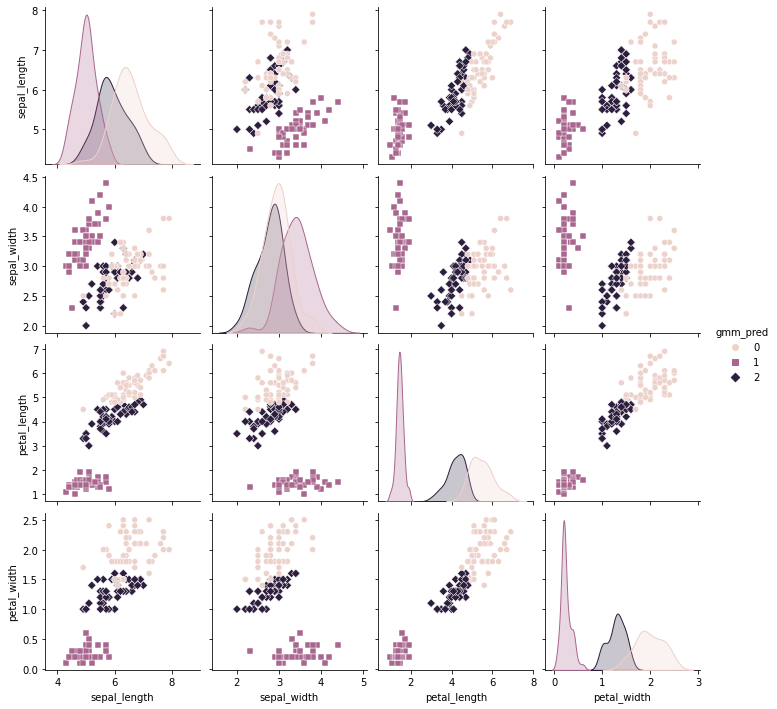

In [111]:
gmm_iris_full = mixture.GaussianMixture(n_components=3).fit(iris[['sepal_length','sepal_width','petal_length','petal_width']])
pred_gmm_iris_full = gmm_iris_full.predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])
iris['gmm_pred'] = pred_gmm_iris_full

# 예측된 군집별 plot 그리기
sns.pairplot(iris, hue="gmm_pred", markers=["o", "s", "D"])

# 기존 군집과 일치하는 정도 수치화
iris_gmm_score = metrics.adjusted_rand_score(iris['species'],pred_gmm_iris_full)

# Print the score
iris_gmm_score

# 나이브 베이즈를 이용한 분류

- 4장에서 배운 나이브 베이즈를 iris에 적용해보자.
- 가우시안 혼합모형과 달리 나이브 베이즈는 모형을 학습하는 과정에서 각 데이터가 속하는 실제 클래스의 정보가 필요하다.
- scikitlearn 내의 naive_bayes 모듈을 이용하여 iris 데이터에 나이브 베이즈를 적용해보자.
- iris 데이터는 연속형 변수이므로 가우시안 나이브 베이즈, 즉, 각 클래스에서 특성값들의 분포가 정규분포임을 가정한 모형을 사용한다.
- 데이터를 절반(Training set, test set)으로 나누어 training set을 통해 모형학습을, test set을 통해 모형평가를 해보자.

In [156]:
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris, test_size=0.5) #  training set, test set

train_X = train[['sepal_length','sepal_width','petal_length','petal_width']]
train_label = train[['species']] # 실제 품종에 대한 정보
test_X = test[['sepal_length','sepal_width','petal_length','petal_width']]
test_label = test[['species']] # 실제 품종에 대한 정보

In [145]:
nb_iris = GaussianNB().fit(train_X, train_label) # training set을 이용한 나이브 베이즈 모형 학습
pred_label = nb_iris.predict(test_X) # 모형을 통해 예측한 test set의 각 품종
pred_prob = nb_iris.predict_proba(test_X) # 데이터가 각 범주에 속할 확률

실제 품종과 모형을 통해 예측한 품종, 각 품종에 속할 확률을 test set의 몇 가지 데이터에 대해 나타내면 다음과 같다.

In [146]:
test['pred_label'] = pred_label
test['pred_prob'] = pred_prob.round(3).tolist()
test[['species','pred_label','pred_prob']].head()

,species,pred_label,pred_prob
86,versicolor,versicolor,"[0.0, 0.516, 0.484]"
52,versicolor,virginica,"[0.0, 0.143, 0.857]"
7,setosa,setosa,"[1.0, 0.0, 0.0]"
40,setosa,setosa,"[1.0, 0.0, 0.0]"
142,virginica,virginica,"[0.0, 0.021, 0.979]"


test set 데이터에 대해 예측된 품종별 plot을 그리면 아래와 같다.

0.7694529504896124

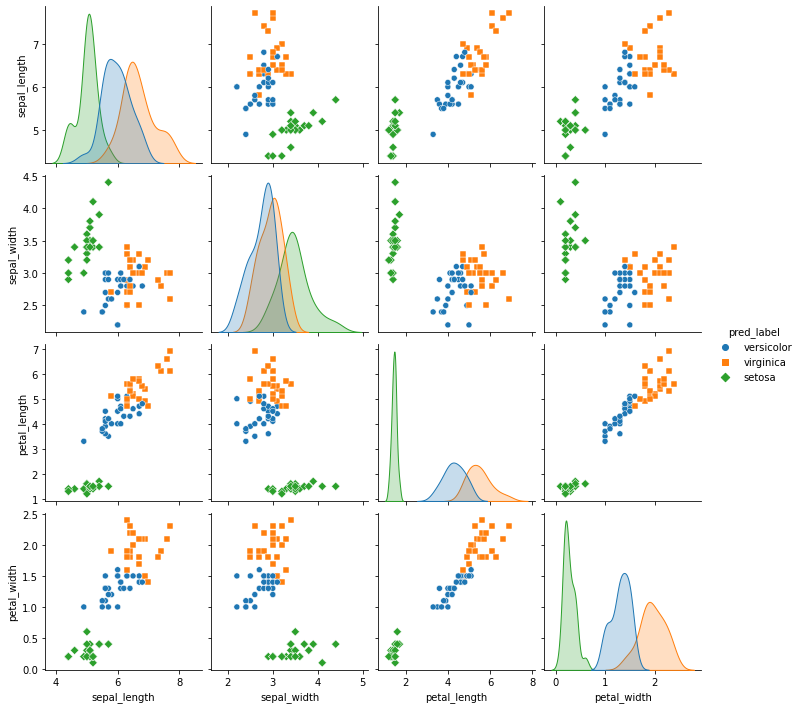

In [155]:
sns.pairplot(test[['sepal_length','sepal_width','petal_length','petal_width','pred_label']], hue="pred_label", markers=["o", "s", "D"])

# 기존 군집과 일치하는 정도 수치화
iris_nb_score = metrics.adjusted_rand_score(test['species'],test['pred_label'])

# # Print the score
iris_nb_score